In [1]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import *
import os

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

from _context import vidlu
from vidlu.utils.presentation.figstyle import figsize

os.makedirs('./data/plots/', exist_ok=True)

## Half-resolution Cityscapes label subsets

In [10]:
def ms(m, s):
    return dict(mean=m, std=s)

def plot_label_subsets(name_to_values, name_to_style, xticks=["$1/8$", "$1/4$", "$1/2$", "$1/1$"], ylim=None):
    w, h = figsize()

    fig, ax1 = plt.subplots(1, 1, sharey=True, figsize=(w*0.9,h*0.9))

    for name, values in name_to_values.items():
        x = list(range(len(values)))
        style = {'color': 'C0', **name_to_style[name]}
        if isinstance(values[0], dict):
            y = np.array([v['mean'] for v in values])
            stds = np.array([v['std'] for v in values])
            ax1.fill_between(x, y-stds/2, y+stds/2, facecolor=style['color'], alpha=0.2, lw=0, interpolate=False)
        else:
            y = values
        ax1.plot(x, y, **style, label=name)

    ax1.set_xlabel('Udio oznaka')
    ax1.set_ylabel('$\mathrm{mIoU}/\%$')
    ax1.set_xticks(range(len(xticks)), xticks)
    if ylim:
        plt.ylim(ylim)
    ax1.legend()
    fig.tight_layout()
    return fig

In [11]:
cols = ["Method", "1/8", "1/4", "1/2", "1/1"]
name_to_values = {
    "DLv2-RN101 supervised": [ms(56.4, 0.4), ms(61.9, 1.1), ms(66.6, 0.6), ms(69.8, 0.4)],
    "DLv2-RN101 MT-CutMix*": [ms(63.2, 1.4), ms(65.6, 0.8), ms(67.6, 0.4), ms(70.0, 0.3)],
    "DLv2-RN101 MT-PhTPS"  : [ms(61.5, 1.0), ms(66.4, 1.1), ms(69.0, 0.6), ms(71.0, 0.7)],
    "SN-RN18 supervised"   : [ms(55.5, 0.9), ms(61.5, 0.5), ms(66.9, 0.7), ms(70.5, 0.6)],
    "SN-RN18 simple-CutMix": [ms(59.8, 0.5), ms(63.8, 1.2), ms(67.0, 1.4), ms(69.3, 1.1)],
    "SN-RN18 simple-PhTPS" : [ms(61.1, 1.6), ms(65.3, 1.9), ms(68.5, 0.6), ms(71.4, 0.6)],
    "SN-RN18 MT-CutMix*"   : [ms(61.6, 0.9), ms(64.6, 0.5), ms(67.6, 0.7), ms(69.9, 0.6)],
    "SN-RN18 MT-CutMix"    : [ms(59.3, 1.3), ms(63.3, 1.0), ms(66.8, 0.6), ms(69.7, 0.5)],
    "SN-RN18 MT-PhTPS"     : [ms(62.0, 1.3), ms(66.0, 1.0), ms(69.1, 0.5), ms(71.2, 0.7)]
}

In [12]:

name_to_style_models = {
    "DLv2-RN101 MT-PhTPS": dict(color='C0', linestyle='dotted'), 
    "DLv2-RN101 MT-CutMix*": dict(color='C1', linestyle='dotted'),
    "DLv2-RN101 supervised": dict(color='C2', linestyle='dotted'),
    "SN-RN18 MT-PhTPS": dict(color='C0'),
    "SN-RN18 MT-CutMix*": dict(color='C1'),
    "SN-RN18 supervised": dict(color='C2')
}

name_to_style_ssl = {
    "SN-RN18 simple-PhTPS": dict(color='C0'),
    "SN-RN18 MT-PhTPS": dict(color='C0', linestyle='dotted'),
    "SN-RN18 simple-CutMix": dict(color='C1'),
    "SN-RN18 MT-CutMix": dict(color='C1', linestyle='dotted'),
    "SN-RN18 supervised": dict(color='C2')
}


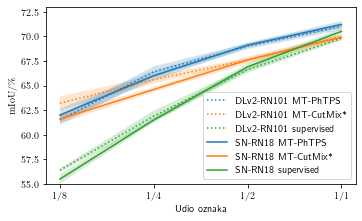

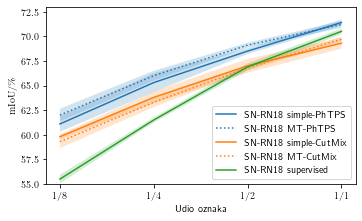

In [13]:

fig = plot_label_subsets({k: name_to_values[k] for k in name_to_style_models.keys()}, name_to_style_models, ylim=[55, 73])
fig.savefig('./data/plots/cs-half-sn-dl.pdf')
fig = plot_label_subsets({k: name_to_values[k] for k in name_to_style_ssl.keys()}, name_to_style_ssl, ylim=[55, 73])
fig.savefig('./data/plots/cs-half-ssl.pdf')

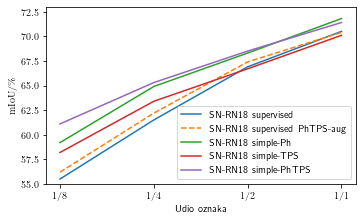

In [16]:
name_to_values = {
    "SN-RN18 supervised"          : [55.5, 61.5, 66.9, 70.5],
    "SN-RN18 supervised PhTPS-aug": [56.2, 62.2, 67.4, 70.4],
    "SN-RN18 simple-Ph"           : [59.2, 64.9, 68.3, 71.8],
    "SN-RN18 simple-TPS"          : [58.2, 63.4, 66.7, 70.1],
    "SN-RN18 simple-PhTPS"        : [61.1, 65.3, 68.5, 71.4],
}
name_to_style = {
    "SN-RN18 supervised"          : dict(color='C0'),
    "SN-RN18 supervised PhTPS-aug": dict(color='C1', linestyle='dashed'),
    "SN-RN18 simple-Ph"           : dict(color='C2'),
    "SN-RN18 simple-TPS"          : dict(color='C3'),
    "SN-RN18 simple-PhTPS"        : dict(color='C4'),
}

fig = plot_label_subsets(name_to_values, name_to_style, ylim=[55, 73])
fig.savefig('./data/plots/cs-half-ablation.pdf')

NameError: name 'name_to_style_simp_mt' is not defined

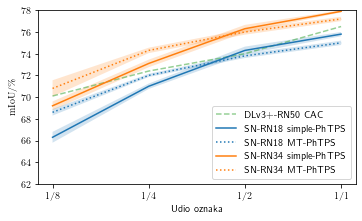

In [17]:
name_to_values = {
    "DLv3+-RN50 supervised": [63.9, 68.3, 71.2, 76.3],
    "DLv3+-RN50 CAC"       : [70.1, 72.4, 74.0, 76.5],
    "SN-RN18 supervised"   : [ms(61.1, 0.4), ms(67.3, 1.1), ms(71.9, 0.1), ms(75.4, 0.4)],
    "SN-RN18 simple-PhTPS" : [ms(66.3, 1.0), ms(71.0, 0.5), ms(74.3, 0.7), ms(75.8, 0.4)],
    "SN-RN18 MT-PhTPS"     : [ms(68.6, 0.6), ms(72.0, 0.3), ms(73.8, 0.4), ms(75.0, 0.4)],
    "SN-RN34 supervised"   : [ms(64.9, 0.8), ms(69.8, 1.0), ms(73.8, 1.4), ms(76.1, 0.8)],
    "SN-RN34 simple-PhTPS" : [ms(69.2, 0.8), ms(73.1, 0.7), ms(76.3, 0.7), ms(77.9, 0.2)],
    "SN-RN34 MT-PhTPS"     : [ms(70.8, 1.5), ms(74.3, 0.5), ms(76.0, 0.5), ms(77.2, 0.4)],
}

name_to_style_dl_sn = {
    "DLv3+-RN50 CAC"       : dict(color='C2', linestyle='dashed', alpha=0.5),
    "SN-RN18 simple-PhTPS" : dict(color='C0'),
    "SN-RN18 MT-PhTPS"     : dict(color='C0', linestyle='dotted'),
    "SN-RN34 simple-PhTPS" : dict(color='C1'),
    "SN-RN34 MT-PhTPS"     : dict(color='C1', linestyle='dotted'),
}

name_to_style_all = {
    "DLv3+-RN50 supervised": dict(color='C2', alpha=0.5),
    "DLv3+-RN50 CAC"       : dict(color='C2', linestyle='dashed', alpha=0.5),
    "SN-RN18 supervised"   : dict(color='C0'),
    "SN-RN18 simple-PhTPS" : dict(color='C0', linestyle='dashed'),
    "SN-RN18 MT-PhTPS"     : dict(color='C0', linestyle='dotted'),
    "SN-RN34 supervised"   : dict(color='C1'),
    "SN-RN34 simple-PhTPS" : dict(color='C1', linestyle='dashed'),
    "SN-RN34 MT-PhTPS"     : dict(color='C1', linestyle='dotted'),
}

name_to_style1 = {
    "DLv3+-RN50 supervised": dict(color='C2', alpha=0.5),
    "DLv3+-RN50 CAC"       : dict(color='C2', linestyle='dashed', alpha=0.5),
    "SN-RN18 supervised"   : dict(color='C0'),
    "SN-RN18 simple-PhTPS" : dict(color='C0', linestyle='dashed'),
    "SN-RN18 MT-PhTPS"     : dict(color='C0', linestyle='dotted'),
}

fig = plot_label_subsets({k: name_to_values[k] for k in name_to_style_dl_sn}, name_to_style_dl_sn, ylim=[62, 78])
fig.savefig('./data/plots/cs-full-ssl.pdf')
#fig = plot_label_subsets({k: name_to_values[k] for k in name_to_style_all}, name_to_style_all, ylim=[62, 78])
#fig.savefig('./data/plots/cs-full2.pdf')

for i, nts in enumerate([name_to_style1, name_to_style_all]):
    fig = plot_label_subsets({k: name_to_values[k] for k in nts}, nts, ylim=[62, 78])
    fig.savefig(f'./data/plots/cs-full{i}.pdf')